In [64]:
import duckdb 
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns


%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [2]:
path_data="../datasets/"
file_data_bruto = "competencia_01.csv"
path_data_bruto=path_data + file_data_bruto

In [4]:
%%sql
create or replace table df as 
select *
from read_csv_auto('../datasets/competencia_01.csv')

,Count
0,978439


In [6]:
%%sql
select * 
from df
LIMIT 5

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,918105588,202101,1,0,0,61,120,3523.36,43807.16,967.03,...,4,0.0,-19941.18,0.0,3632,16033.69,20,0,15307.65,Continua
1,918119003,202101,1,0,1,44,120,8245.74,81380.94,1611.15,...,4,0.0,-29325.00,0.0,2902,6440.36,1,0,0.00,Continua
2,918123743,202101,0,0,1,60,120,-42924.73,225427.90,0.00,...,<NA>,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,NaN,Continua
3,918123965,202101,1,0,0,34,120,7025.42,58141.36,858.11,...,4,0.0,-15387.39,0.0,3640,13984.59,18,0,11952.87,Continua
4,918147740,202101,1,0,0,28,115,276.74,-4763.50,393.81,...,4,0.0,-29778.52,0.0,3261,19032.80,10,0,3331.32,Continua


In [ ]:
duckdb.sql("DESCRIBE df").show()

┌─────────────────────────┬─────────────┬─────────┬─────────┬─────────┬─────────┐
│       column_name       │ column_type │  null   │   key   │ default │  extra  │
│         varchar         │   varchar   │ varchar │ varchar │ varchar │ varchar │
├─────────────────────────┼─────────────┼─────────┼─────────┼─────────┼─────────┤
│ numero_de_cliente       │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ foto_mes                │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ active_quarter          │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ cliente_vip             │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ internet                │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ cliente_edad            │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ cliente_antiguedad      │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ mrentabilidad           │ DOUBLE      │ YES     │ NULL    │ NULL    │ NULL    │
│ mrentabilidad_

In [21]:
duckdb.sql("SELECT * FROM df LIMIT 0").show()


┌───────────────────┬──────────┬────────────────┬─────────────┬──────────┬──────────────┬────────────────────┬───────────────┬──────────────────────┬─────────────┬─────────────────┬─────────────────┬────────────┬──────────┬───────────────────┬─────────────────────────────┬───────────────────┬──────────────┬──────────────┬────────────────────────┬──────────────────────┬──────────────────────────┬────────────────┬─────────────────┬───────────────────────────────┬───────────────┬───────────────┬─────────────────────────────┬───────────────────────┬─────────────────┬───────────────────────────────┬─────────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬─────────────────────────┬─────────────────────────┬─────────────┬─────────────────────┬───────────────────┬─────────────┬───────────────────┬─────────────────────┬─────────────┬─────────────┬──────────────┬──────────────┬──────────────────┬───────────────────────────────┬────

In [23]:
%%sql
select *
from df
LIMIT 0

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria


In [9]:
%%sql 

SELECT foto_mes , AVG(mrentabilidad) as 'media_rentabilidad'
FROM df
GROUP BY foto_mes

,foto_mes,media_rentabilidad
0,202101,2392.345413
1,202102,1795.285903
2,202103,2443.470943
3,202104,1920.779234
4,202105,2075.065041
5,202106,2295.674335


In [16]:
%%sql 

with promedio_por_foto_mes as (
    select foto_mes , AVG(mrentabilidad) as media_rentabilidad
    from df
    group by foto_mes
)
select t2.numero_de_cliente , t2.foto_mes , t2.mrentabilidad,p.media_rentabilidad,
if(t2.mrentabilidad > p.media_rentabilidad , 'mayor', 'menor') as mayor_que_la_media
from df t2
join promedio_por_foto_mes p using (foto_mes)  


,numero_de_cliente,foto_mes,mrentabilidad,media_rentabilidad,mayor_que_la_media
0,918105588,202101,3523.36,2392.345413,mayor
1,918119003,202101,8245.74,2392.345413,mayor
2,918123743,202101,-42924.73,2392.345413,menor
3,918123965,202101,7025.42,2392.345413,mayor
4,918147740,202101,276.74,2392.345413,menor
...,...,...,...,...,...
978434,1598368433,202106,4123.09,2295.674335,mayor
978435,1598419415,202106,-2.26,2295.674335,menor
978436,1598425905,202106,5.92,2295.674335,menor
978437,1598470389,202106,244.96,2295.674335,menor


In [20]:
%%sql
with promedio_comisiones as (
    select foto_mes , AVG(mcomisiones) as media_comisiones_por_mes
    from df
    group by foto_mes
)
select t2.foto_mes , t2.numero_de_cliente , t2.mcomisiones , p.media_comisiones_por_mes,
CASE WHEN (t2.mcomisiones >  p.media_comisiones_por_mes) THEN ('MAYOR')
ELSE 'menor'
END AS 'comparacion_con_media'
from df t2
join promedio_comisiones p using (foto_mes)
ORDER BY t2.numero_de_cliente

,foto_mes,numero_de_cliente,mcomisiones,media_comisiones_por_mes,comparacion_con_media
0,202101,249221323,1278.11,1841.911252,menor
1,202105,249221323,1008.80,1481.343392,menor
2,202103,249221323,755.85,1785.631425,menor
3,202102,249221323,1230.47,1124.102600,MAYOR
4,202106,249221323,1227.27,1497.073134,menor
...,...,...,...,...,...
978434,202106,1598368433,2242.51,1497.073134,MAYOR
978435,202106,1598419415,0.00,1497.073134,menor
978436,202106,1598425905,0.00,1497.073134,menor
978437,202106,1598470389,0.00,1497.073134,menor


In [39]:
df= pl.read_csv("../datasets/competencia_01.csv")
df.head()

numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,cproductos,tcuentas,ccuenta_corriente,mcuenta_corriente_adicional,mcuenta_corriente,ccaja_ahorro,mcaja_ahorro,mcaja_ahorro_adicional,mcaja_ahorro_dolares,cdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,…,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_cconsumos,Master_cadelantosefectivo,Master_mpagominimo,Visa_delinquency,Visa_status,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,i64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64,f64,i64,i64,f64,i64,f64,i64,f64,i64,…,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,str
918105588,202101,1,0,0,61,120,3523.36,43807.16,967.03,1531.93,647.38,11,1,1,0.0,-29.46,2,33840.15,0.0,0.0,1,13961.04,1,12,26298.76,1,21,17154.8,0,0,0.0,1,19996.48,0,0.0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,0,126684.0,-757,null,57041.67,66909.87,0.0,16033.69,0.0,140760.0,0.0,0.0,4,0.0,-19941.18,0.0,3632,16033.69,20,0,15307.65,"""Continua"""
918119003,202101,1,0,1,44,120,8245.74,81380.94,1611.15,1329.36,4326.73,8,1,1,0.0,-6196.63,2,37958.86,0.0,0.0,1,-8499.39,1,1,107.91,1,25,43084.67,1,7,16515.94,7,170264.44,0,0.0,0,…,13048.31,0.0,140760.0,0.0,0,4,0.0,-35190.0,0.0,1538,13048.31,5,0,20679.99,0,0,101347.2,-1488,null,-400.97,-470.33,0.0,6440.36,0.0,112608.0,0.0,0.0,4,0.0,-29325.0,0.0,2902,6440.36,1,0,0.0,"""Continua"""
918123743,202101,0,0,1,60,120,-42924.73,225427.9,0.0,-36551.35,-42.63,5,1,1,0.0,-2.6103e6,2,0.0,0.0,0.0,0,-2.6102e6,1,0,0.0,0,0,0.0,0,0,0.0,7,70943.84,0,0.0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Continua"""
918123965,202101,1,0,0,34,120,7025.42,58141.36,858.11,4920.67,337.05,8,1,1,0.0,-1635.81,2,7351.87,0.0,1.02,1,-57.28,1,8,4404.6,1,21,19418.93,1,11,10696.39,3,109437.51,0,0.0,0,…,8389.99,1.16,70380.0,0.0,0,4,0.0,-21896.23,0.0,3308,8389.99,8,0,11307.72,0,0,63342.0,-1853,null,39035.96,45789.18,0.0,13984.59,0.0,70380.0,0.0,0.0,4,0.0,-15387.39,0.0,3640,13984.59,18,0,11952.87,"""Continua"""
918147740,202101,1,0,0,28,115,276.74,-4763.5,393.81,-855.89,756.09,7,1,1,0.0,0.0,2,52610.45,0.0,106.49,1,16307.02,2,17,65160.43,1,12,26403.39,1,9,12965.08,0,0.0,0,0.0,0,…,6539.04,11.71,84456.0,0.0,0,4,0.0,-52619.56,5.92,641,6539.04,9,0,3002.88,0,0,76010.4,-2218,null,23011.3,26579.03,413.22,19032.8,4.68,84456.0,0.0,0.0,4,0.0,-29778.52,0.0,3261,19032.8,10,0,3331.32,"""Continua"""


In [28]:
df.columns

['numero_de_cliente',
 'foto_mes',
 'active_quarter',
 'cliente_vip',
 'internet',
 'cliente_edad',
 'cliente_antiguedad',
 'mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'cproductos',
 'tcuentas',
 'ccuenta_corriente',
 'mcuenta_corriente_adicional',
 'mcuenta_corriente',
 'ccaja_ahorro',
 'mcaja_ahorro',
 'mcaja_ahorro_adicional',
 'mcaja_ahorro_dolares',
 'cdescubierto_preacordado',
 'mcuentas_saldo',
 'ctarjeta_debito',
 'ctarjeta_debito_transacciones',
 'mautoservicio',
 'ctarjeta_visa',
 'ctarjeta_visa_transacciones',
 'mtarjeta_visa_consumo',
 'ctarjeta_master',
 'ctarjeta_master_transacciones',
 'mtarjeta_master_consumo',
 'cprestamos_personales',
 'mprestamos_personales',
 'cprestamos_prendarios',
 'mprestamos_prendarios',
 'cprestamos_hipotecarios',
 'mprestamos_hipotecarios',
 'cplazo_fijo',
 'mplazo_fijo_dolares',
 'mplazo_fijo_pesos',
 'cinversion1',
 'minversion1_pesos',
 'minversion1_dolares',
 'cinversion2',
 'minversi

In [36]:
type(df)

polars.dataframe.frame.DataFrame

In [32]:
%%sql
select foto_mes , AVG(mcomisiones)
from df
group by foto_mes

,foto_mes,avg(mcomisiones)
0,202101,1841.911252
1,202102,1124.102600
2,202103,1785.631425
3,202104,1389.534564
4,202105,1481.343392
5,202106,1497.073134


In [ ]:
df.select

In [49]:
pl.col(pl.NUMERIC_DTYPES)

C:\Users\chris\AppData\Local\Temp\ipykernel_13404\3554708932.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  pl.col(pl.NUMERIC_DTYPES)


<Expr ['[cs.by_dtype([Int32, Float64, …'] at 0x199575EFAD0>

In [54]:
df.select(pl.selectors.numeric())

numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,cproductos,tcuentas,ccuenta_corriente,mcuenta_corriente_adicional,mcuenta_corriente,ccaja_ahorro,mcaja_ahorro,mcaja_ahorro_adicional,mcaja_ahorro_dolares,cdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,…,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_cconsumos,Master_cadelantosefectivo,Master_mpagominimo,Visa_delinquency,Visa_status,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,i64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64,f64,i64,i64,f64,i64,f64,i64,f64,i64,…,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64
918105588,202101,1,0,0,61,120,3523.36,43807.16,967.03,1531.93,647.38,11,1,1,0.0,-29.46,2,33840.15,0.0,0.0,1,13961.04,1,12,26298.76,1,21,17154.8,0,0,0.0,1,19996.48,0,0.0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,0,126684.0,-757,null,57041.67,66909.87,0.0,16033.69,0.0,140760.0,0.0,0.0,4,0.0,-19941.18,0.0,3632,16033.69,20,0,15307.65
918119003,202101,1,0,1,44,120,8245.74,81380.94,1611.15,1329.36,4326.73,8,1,1,0.0,-6196.63,2,37958.86,0.0,0.0,1,-8499.39,1,1,107.91,1,25,43084.67,1,7,16515.94,7,170264.44,0,0.0,0,…,0.0,13048.31,0.0,140760.0,0.0,0,4,0.0,-35190.0,0.0,1538,13048.31,5,0,20679.99,0,0,101347.2,-1488,null,-400.97,-470.33,0.0,6440.36,0.0,112608.0,0.0,0.0,4,0.0,-29325.0,0.0,2902,6440.36,1,0,0.0
918123743,202101,0,0,1,60,120,-42924.73,225427.9,0.0,-36551.35,-42.63,5,1,1,0.0,-2.6103e6,2,0.0,0.0,0.0,0,-2.6102e6,1,0,0.0,0,0,0.0,0,0,0.0,7,70943.84,0,0.0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
918123965,202101,1,0,0,34,120,7025.42,58141.36,858.11,4920.67,337.05,8,1,1,0.0,-1635.81,2,7351.87,0.0,1.02,1,-57.28,1,8,4404.6,1,21,19418.93,1,11,10696.39,3,109437.51,0,0.0,0,…,102.28,8389.99,1.16,70380.0,0.0,0,4,0.0,-21896.23,0.0,3308,8389.99,8,0,11307.72,0,0,63342.0,-1853,null,39035.96,45789.18,0.0,13984.59,0.0,70380.0,0.0,0.0,4,0.0,-15387.39,0.0,3640,13984.59,18,0,11952.87
918147740,202101,1,0,0,28,115,276.74,-4763.5,393.81,-855.89,756.09,7,1,1,0.0,0.0,2,52610.45,0.0,106.49,1,16307.02,2,17,65160.43,1,12,26403.39,1,9,12965.08,0,0.0,0,0.0,0,…,1034.1,6539.04,11.71,84456.0,0.0,0,4,0.0,-52619.56,5.92,641,6539.04,9,0,3002.88,0,0,76010.4,-2218,null,23011.3,26579.03,413.22,19032.8,4.68,84456.0,0.0,0.0,4,0.0,-29778.52,0.0,3261,19032.8,10,0,3331.32
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1598368433,202106,1,0,0,58,1,4123.09,4123.09,2242.51,731.71,871.51,6,2,1,0.0,0.0,2,0.0,0.0,0.0,1,0.0,1,0,0.0,1,4,22335.65,1,2,11144.77,0,0.0,0,0.0,0,…,0.0,2542.88,0.0,140760.0,0.0,0,7,0.0,0.0,0.0,28,2542.88,1,0,1090.89,0,0,126684.0,-2190,null,19269.98,22603.68,0.0,12521.76,0.0,140760.0,0.0,0.0,7,0.0,0.0,0.0,28,12521.76

In [56]:
num_cols = df.select(pl.selectors.numeric()).columns
sql='select foto_mes '
for c in num_cols:
    sql+=f', AVG({c}) as {c}_media'

sql+=' from df group by foto_mes'

con = duckdb.connect(database=":memory:")
con.register("df", df)
medias_por_mes=con.execute(sql).df()
con.close()

In [57]:
medias_por_mes

,foto_mes,numero_de_cliente_media,foto_mes_media,active_quarter_media,cliente_vip_media,internet_media,cliente_edad_media,cliente_antiguedad_media,mrentabilidad_media,mrentabilidad_annual_media,...,Visa_madelantodolares_media,Visa_fultimo_cierre_media,Visa_mpagado_media,Visa_mpagospesos_media,Visa_mpagosdolares_media,Visa_fechaalta_media,Visa_mconsumototal_media,Visa_cconsumos_media,Visa_cadelantosefectivo_media,Visa_mpagominimo_media
0,202101,7.657526e+08,202101.0,0.984845,0.002891,0.035814,46.765327,132.900976,2392.345413,23732.645835,...,0.042062,6.954574,9388.167907,-36981.968525,9.644834,3188.818907,19938.340805,7.945330,0.007921,6117.506441
1,202104,7.720350e+08,202104.0,0.987351,0.002338,0.062686,46.892380,134.238890,1920.779234,23861.720197,...,0.010110,4.936214,3644.165492,-37050.528967,5.626806,3225.345846,21975.942632,8.121568,0.008661,6155.158392
2,202105,7.743315e+08,202105.0,0.987542,0.002410,0.059921,46.814510,134.675988,2075.065041,24185.914299,...,0.018776,7.930829,10730.160160,-38205.890925,5.825702,3238.220153,22341.463964,7.753529,0.007514,6414.158269
3,202103,7.700625e+08,202103.0,0.986647,0.002317,0.052333,46.803162,133.734184,2443.470943,23861.362834,...,0.012883,3.663859,3628.280329,-39131.574729,8.393818,3209.795342,20972.719752,8.007993,0.008121,6658.079690
4,202102,7.676236e+08,202102.0,0.985705,0.002331,0.047911,46.791224,133.401030,1795.285903,23464.248289,...,0.031842,-0.050575,4897.534099,-35487.927291,7.303701,3200.663379,23970.223789,9.575386,0.009632,6815.378859
5,202106,7.764953e+08,202106.0,0.988272,0.005514,0.049491,46.815766,135.127111,2295.674335,24797.616857,...,0.025282,2.943783,5036.083848,-40199.154567,6.592488,3249.497645,26523.539731,9.024945,0.008763,7181.845679


In [63]:
len(medias_por_mes.columns)/2

77.0

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

def crear_reporte_pdf(df, xcol, columnas_y, salida_pdf, titulo="Reporte de gráficos"):
    """
    Genera un PDF con una página por gráfico (scatter) de df[xcol] vs cada columna en `columnas_y`.
    """
    with PdfPages(salida_pdf) as pdf:
        # Portada
        fig = plt.figure(figsize=(11.69, 8.27))  # A4 apaisado
        fig.text(0.5, 0.6, titulo, ha="center", va="center", fontsize=20)
        fig.text(0.5, 0.5, f"Variables: {len(columnas_y)}", ha="center", va="center")
        fig.text(0.5, 0.4, f"Eje X: {xcol}", ha="center", va="center")
        fig.text(0.5, 0.2, "Generado con matplotlib", ha="center", va="center", fontsize=9)
        pdf.savefig(fig); plt.close(fig)

        # Una página por gráfico
        for col in columnas_y:
            fig, ax = plt.subplots(figsize=(11.69, 8.27))
            sns.lineplot(data=df , x = xcol , y =col,ax=ax)
            sns.scatterplot(data=df , x = xcol , y =col,ax=ax)
            # ax.lineplot(df[xcol], df[col])
            # ax.scatter(df[xcol], df[col], s=10)
            ax.set_title(f"{col} vs {xcol}")
            ax.set_xlabel(xcol)
            ax.set_ylabel(col)
            ax.grid(True, alpha=0.3)
            fig.tight_layout()
            pdf.savefig(fig)
            plt.close(fig)

        # Metadatos del PDF
        d = pdf.infodict()
        d['Title'] = titulo
        d['Author'] = "Tu nombre"
        d['Subject'] = "Reporte automático de gráficos"
        d['Keywords'] = "matplotlib, reporte, gráficos"
        d['Creator'] = "Python + Matplotlib"

crear_reporte_pdf(medias_por_mes, xcol='foto_mes', columnas_y=medias_por_mes.columns,
                  salida_pdf="reporte_medias_por_mes.pdf",
                  titulo="Medias por mes — Scatter por variable")


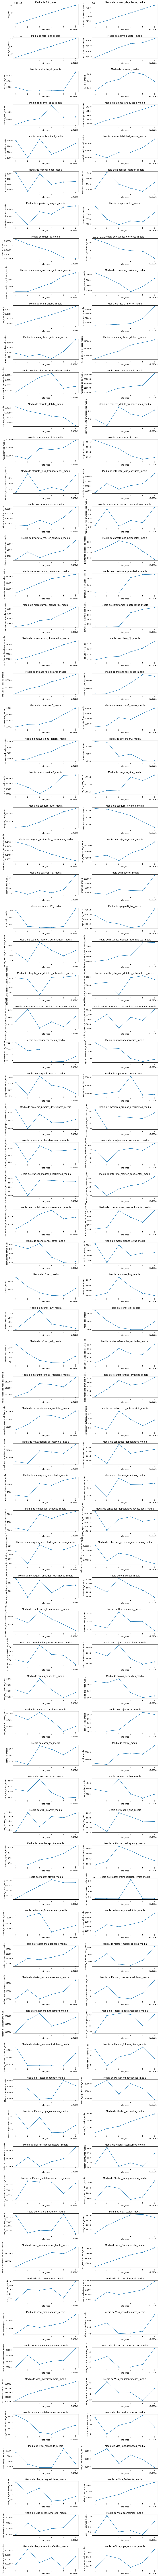

In [ ]:
fig , axes = plt.subplots(77,2,figsize=(12, 77 * 2.5))
axes=axes.flatten()
for i,c in enumerate(medias_por_mes.columns):
    ax=axes[i]
    sns.lineplot(data=medias_por_mes , x='foto_mes' , y=c ,ax=ax )
    sns.scatterplot(data=medias_por_mes , x='foto_mes' , y=c ,ax=ax )
    ax.set_title(f"Media de {c}")
plt.tight_layout()
plt.show()